# Before to start 

## **History**

A business manager of a consumer credit card portfolio is facing the problem of customer attrition. He wants to analyze the data to find out the reason behind this and leverage the same to predict customers who are likely to drop off. This way they could aim customers with higher chance to leaves theirs services.

## **Context**

The marketing department allowed a budget of 25000€ to target customers with their loyalty process. The loyalty process, is an ensemble of actions directed toward a customer in order to increase it's loyalty to the bank and prevent customer to churn. This loyalty campaign has an average unitary cost of 19€ by customer targeted and cannot simply applied to all customers.

When the loyalty process is applied to a customer we expect that the customer will generate a minimum of 150€ for the years coming.

The bank has a dataset of its 10127 customers the ones who churn and the ones that are still members of the bank. We will be able to build a model to determine the customers which are the the most likely to churn.

Scores will be based on how well a classifier can prioritize 13% of the population since that is all our budget allows for when deploying a model to classify all our customers (10127).
* $ 13\% * 10127 \approx 1316 $
* $ 1316 * 19 \approx 25000€ $

## **The Goal**

This project is carried out into multiple steps:

 * The first part consists of an exploratory analysis, where the objective is to get to know our data. We will analyze our attributes to find relationships and informations. We will be able to identify pattern or informations that indicate a strong relationship with the cancellation of credit card service customers.
 
 * The second part, which consists of applying engineering techniques as well as transformation. We will explore more in depth, which features to keep, to use, and to transform. 
 
 * The third part consists of applying a machine learning algorithm to find the best procedure for building the model. We will build pipeline with multiple hyperparameters to test and we will chose the best model.

## **Data set**

This data set consists of 10,000 customers mentioning their age, salary, status marital, credit card limit, credit card category, etc.

We have only 16,07% of customers who have canceled. Therefore, it is a little difficult to train our model to predict customer turnover.


**Variables**
* Customer_Age

* The Avg_Utilization_Ratio : represents how much of the available credit the customer spent.
* Total_Relationship_Count: total number of products held by the customers (cards, accounts, etc.)
* Contacts_count_12_mont: Number of times the bank contacted the customer and/or viceversa.
* Total_Amt_Chng_Q4_Q1: represents how much the customer increased their expenditure when comparing the 4th quarter agains the 1st.
* Total_Ct_Chng_Q4_Q1: similar to the previous but in number of transactions.
* Avg_Open_To_Buy : It represents the average of the 'Open to Buy' value for the last 12 months. 'Open to Buy' means the amount left in your credit card to use (Limit - Used amount which hasn't been paid off yet).

* Total_Relationship_Count : Total no. of products held by the customer
* Months_Inactive_12_mon : No. of months inactive in the last 12 months
* Contacts_Count_12_mon : No. of Contacts in the last 12 months

## Loading dependencies

In [1]:
# Data manipulation
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Custom module
from support.pipeline import *
from support.utility import *

# Vizualisation
import matplotlib.pyplot as plt
import seaborn as sns
from pycomp.viz.insights import *

# other
import os
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

imported


In [2]:
os.chdir("/home/ubenz/Documents/project/bankgraph/")

# Global Analysis

In [3]:
# import data (deleting last two columns as they are of no use for us)
data = pd.read_csv("data/BankChurners.csv.zip")
data = data.iloc[:,:-2]
print(data.shape)
data.head(3)

(10127, 21)


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000


**We will compute the attrition rate in our dataset**

- We have the records for 10127 customers in our dataset

- We have an attrition rate of 16.07%. It represents the percentage of people who left our bank.



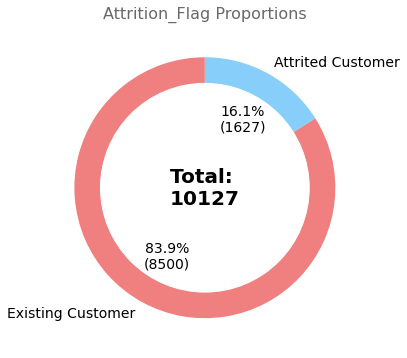

In [4]:
rate_attrition = data["Attrition_Flag"].value_counts(normalize=True)
print("- We have the records for {} customers in our dataset\n".format(data["CLIENTNUM"].nunique()))

print("- We have an attrition rate of {0:2=.2%}. It represents the percentage of people who left our bank.\n".format(rate_attrition.values[1]))

labels = rate_attrition.keys()
plot_donut_chart(df=data, col='Attrition_Flag',
                 colors=['lightcoral', 'lightskyblue'],
                 title='Attrition_Flag Proportions',
                 figsize=(6,6))

**Split the data into train and test**

We need to keep our data similar between test and train set, so we will stratify it in order to keep the same ratio of attrited and existing customer in both dataset. We will also shuffle it to preserve randomness.

In [5]:
X, y = data.drop('Attrition_Flag', axis=1), data["Attrition_Flag"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3, stratify=y, shuffle=True, test_size=.3)

In [6]:
print('- Number of training records: {}{}'.format(len(X_train), "\n"))
print('- Training proportions:\n\n{}'.format(round(y_train.value_counts(normalize=True)*100,2)))

- Number of training records: 7088

- Training proportions:

Existing Customer    83.93
Attrited Customer    16.07
Name: Attrition_Flag, dtype: float64


In [7]:
print('- Number of test records: {}{}'.format(len(X_test), "\n"))
print('- Training proportions:\n\n{}'.format(round(y_test.value_counts(normalize=True)*100,2)))

- Number of test records: 3039

- Training proportions:

Existing Customer    83.94
Attrited Customer    16.06
Name: Attrition_Flag, dtype: float64


*Both dataset keeps distribution of Attrition_Flag ( target )*

**We have our test and train set, we save them.**

In [8]:
df_test = pd.concat([X_test, y_test], axis=1)
print('Test dataset shape:', df_test.shape)
df_test.to_csv('data/test.csv', sep=',', index=False)

Test dataset shape: (3039, 21)


In [9]:
df_train = pd.concat([X_train, y_train], axis=1)
print('Train dataset shape:', df_train.shape)
df_train.to_csv('data/train.csv', sep=',', index=False)

Train dataset shape: (7088, 21)


*From now on, we will only use out train set.*

### Now we will separate categorical from numerical data

In [10]:
categorical_col = df_train.select_dtypes(["object"]).columns.tolist()
categorical_col.remove("Attrition_Flag")

numerical_col = df_train.select_dtypes(exclude=["object"]).columns.tolist()
numerical_col.remove("CLIENTNUM")

When we look at our data we can see that some of our numerical variables can be treated as discrete.

In [11]:
print(df_train[numerical_col].nunique().sort_values())

Dependent_count                6
Total_Relationship_Count       6
Months_Inactive_12_mon         7
Contacts_Count_12_mon          7
Months_on_book                44
Customer_Age                  45
Total_Trans_Ct               126
Total_Ct_Chng_Q4_Q1          771
Avg_Utilization_Ratio        937
Total_Amt_Chng_Q4_Q1        1066
Total_Revolving_Bal         1833
Total_Trans_Amt             4164
Credit_Limit                4769
Avg_Open_To_Buy             5153
dtype: int64


We will treat these numerical variables as discrete : 
`"Contacts_Count_12_mon", "Dependent_count", "Months_Inactive_12_mon", "Total_Relationship_Count"`

In [12]:
discrete_var = ["Contacts_Count_12_mon", "Dependent_count", "Months_Inactive_12_mon", "Total_Relationship_Count"]
categorical_col.extend(["Contacts_Count_12_mon", "Dependent_count", "Months_Inactive_12_mon", "Total_Relationship_Count"])
numerical_col = list(set(numerical_col) - set(categorical_col))

## Let's first focus our analysis on categorical data

In [13]:
# We have no missing value
df_train.isna().sum()

CLIENTNUM                   0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
Attrition_Flag              0
dtype: int64

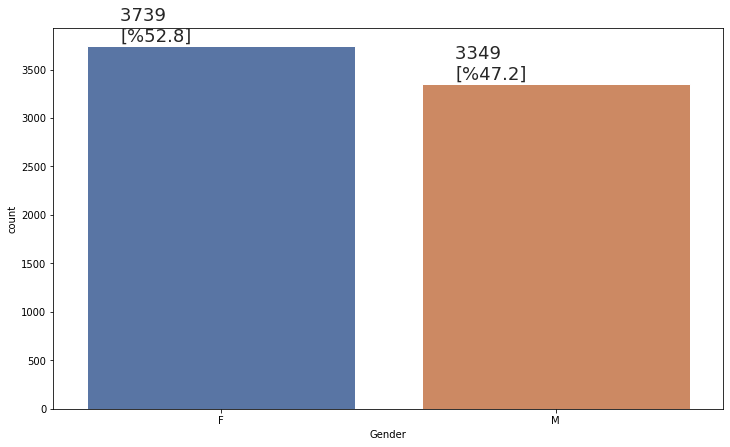

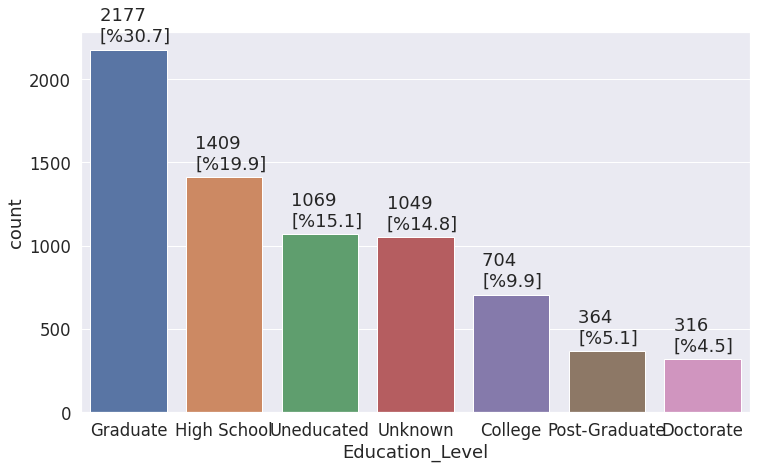

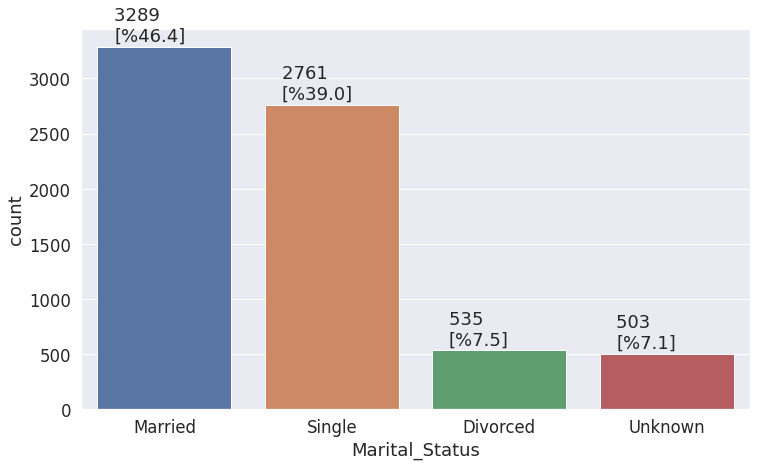

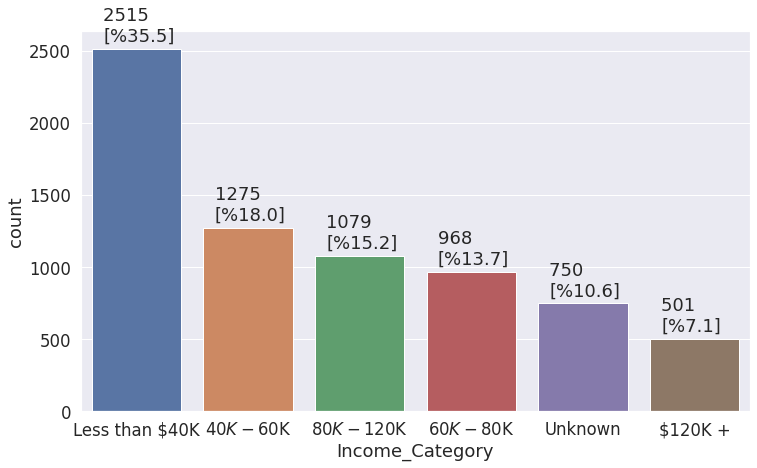

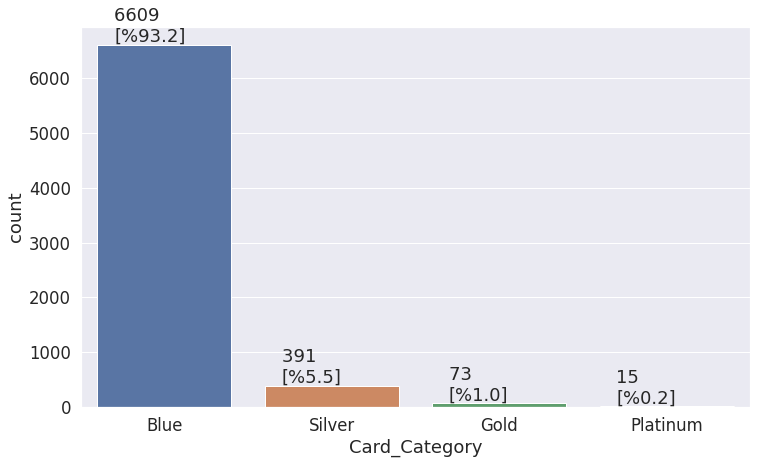

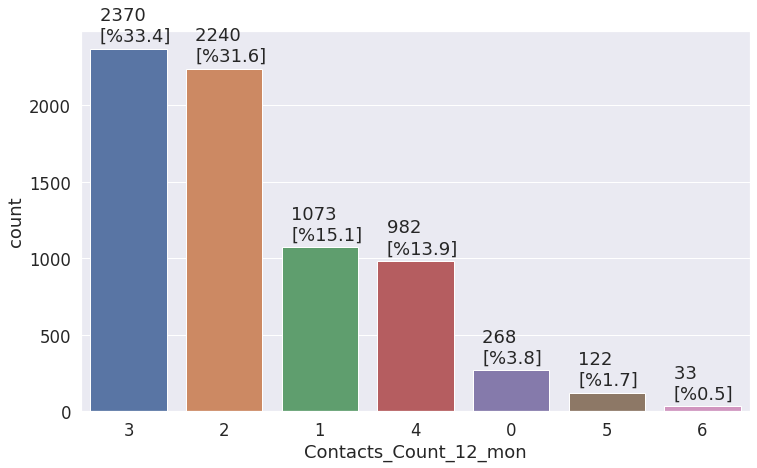

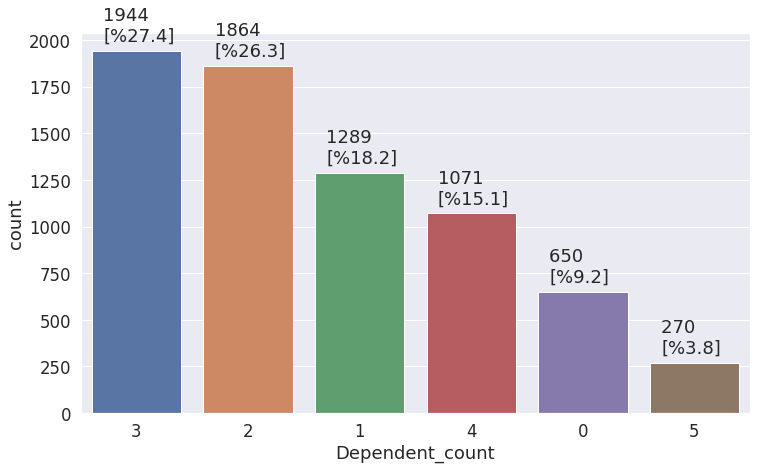

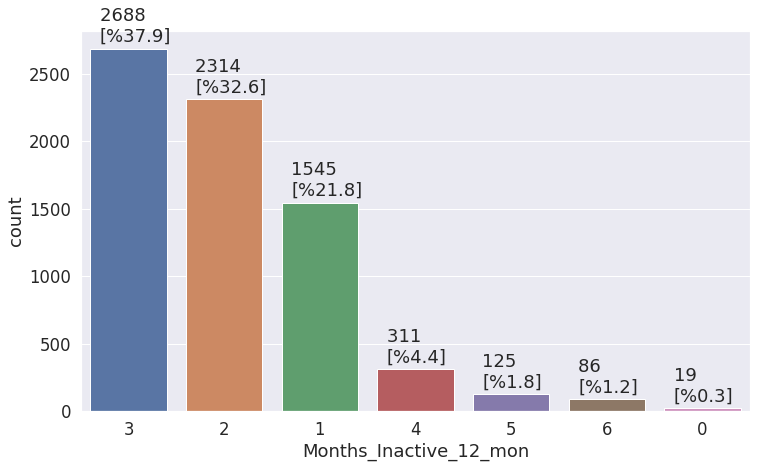

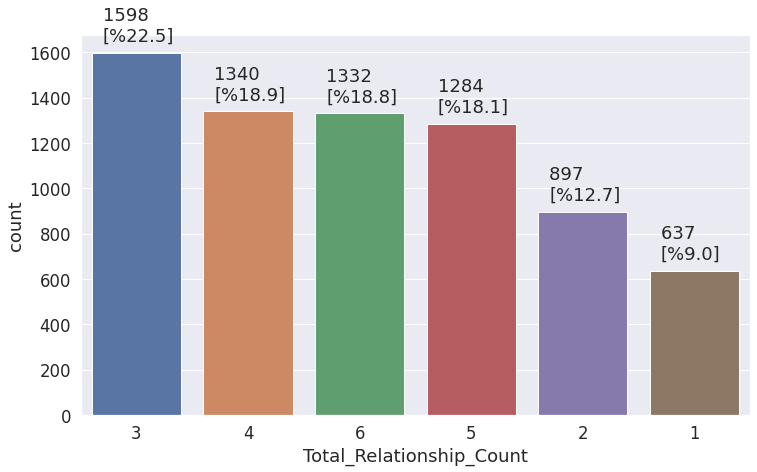

In [14]:
plot_categorical(categorical_col, df_train)

* `Gender` : We have almost same proportion of male and female in our dataset. Not a huge difference.

* `Education_Level` : Most of the people have some form of education,. There are fewer highly qualified education level ( post-grad / doctorate ) that we could merge if 'support' is too low to be valuable. Also the bank could have a better understanding of their customer (a lot of unknown). Finally we have a part of the customers which are uneducted not a majority but a fair amount.

* `Martital_Status` : The bank has a good view on marital status ( could be improved some unknown ). Almost half the customers are married and 40 % single. The rest are equivalently divorced (7%) or unknown (7%).

* `Income_Category` : We have almost a 40% of customers earning less than 40K(low/middle income) and almost 40%, earning more than 80K (high income). We have a good part of unknown income as well.

* `Card_Category` : We have large majority of the customers owning a blue card (93%). Fewer using silver (5,5%), and fewer using gold (1%) and platinum (0.2%).

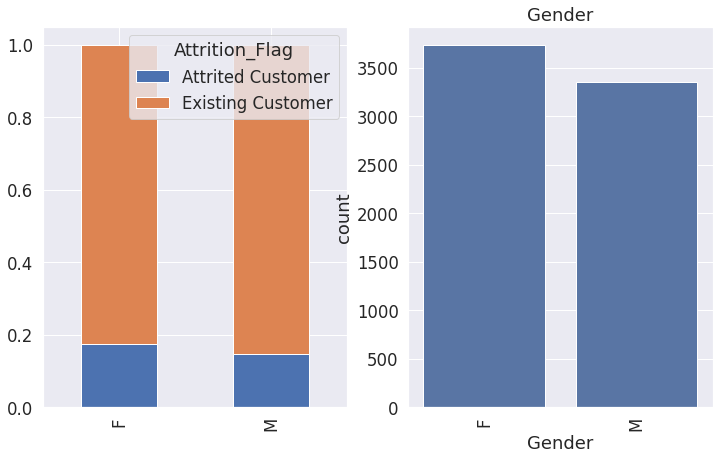

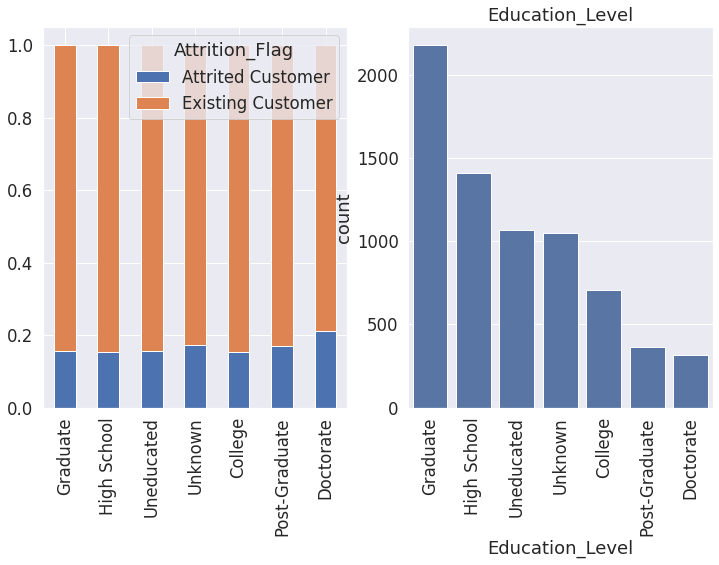

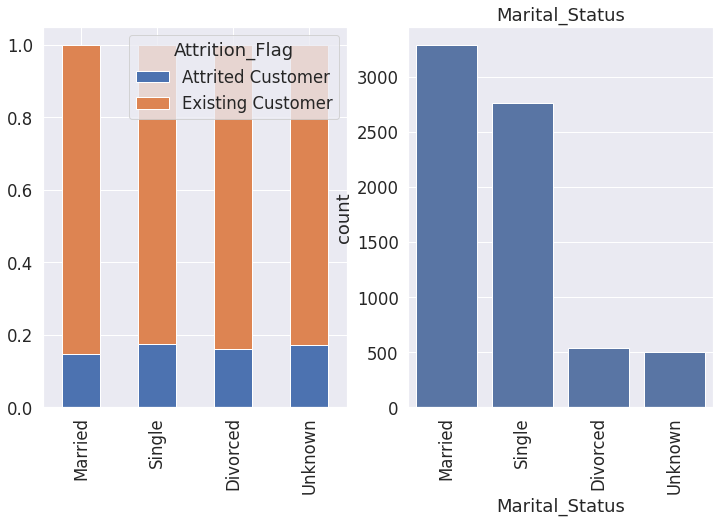

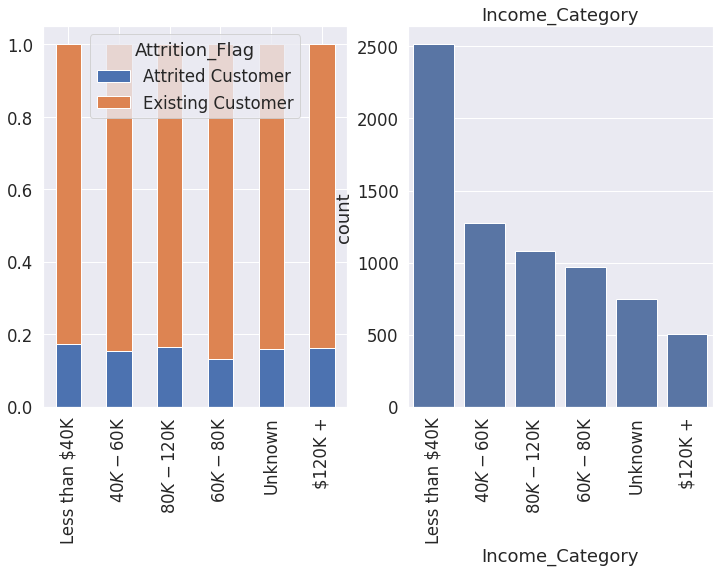

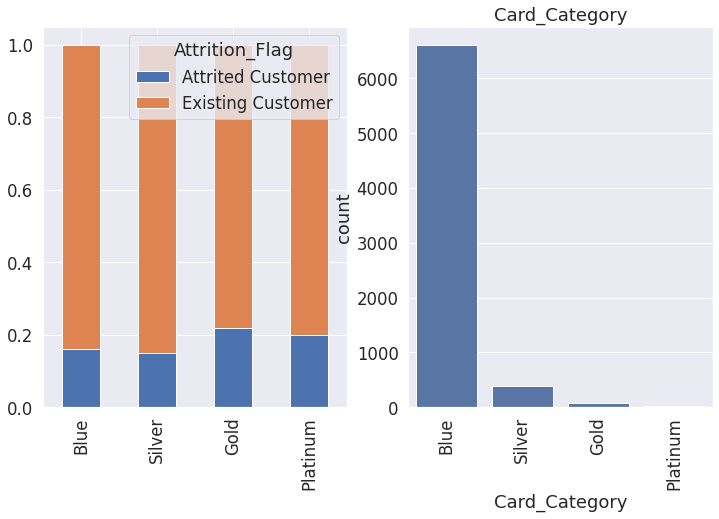

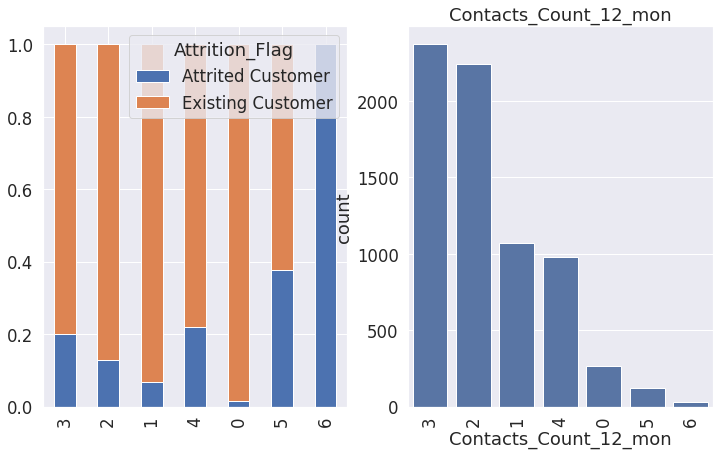

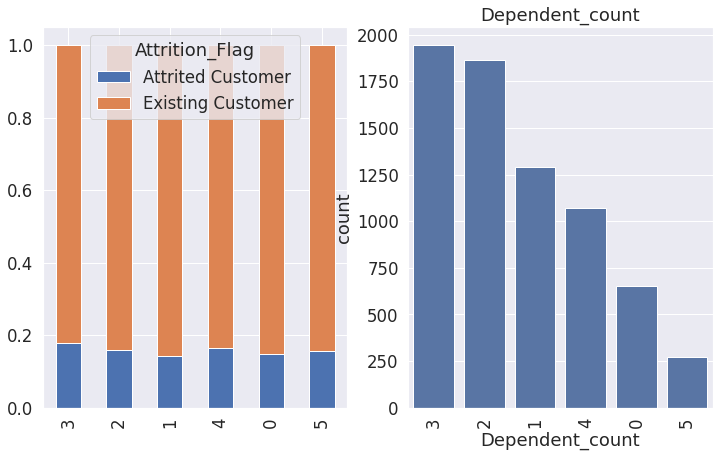

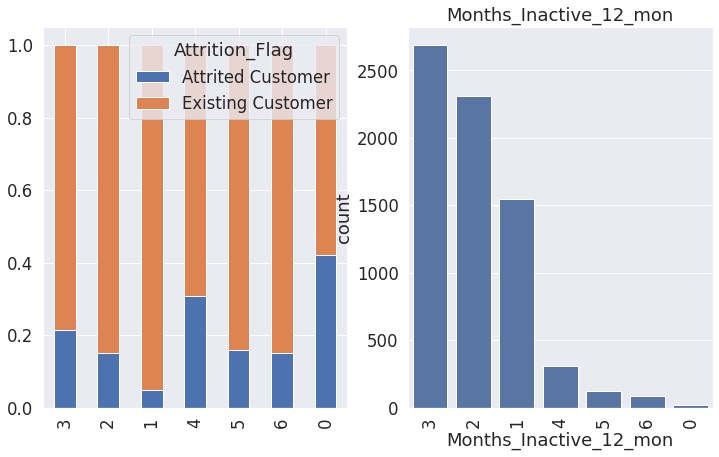

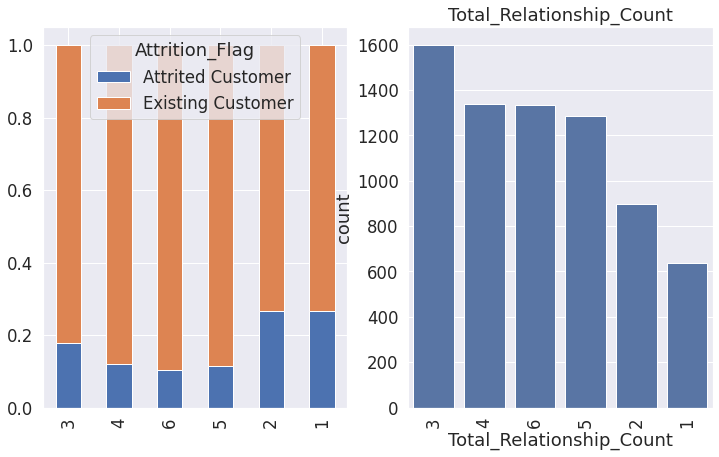

In [15]:
plot_categorical_distrib(categorical_col,df_train)

* `Education_Level` is not very predictive of outcome but it seems that customer with higher education tend to churn more
* `Marital_Status` is not that much predictive 
* `Income_Category` does not provide a strong predictive power but we can observe that 60-80K category customer seems to have lower churn rate
* `Card_Category` suggest that people with gold card will churn slighty more often than others
* `Contacts_Count_12_mon` we can see huge difference in attrition rate for the different values. This variable seems to be very predictive. All customers with 6 Contacts Count have attrited. Almost half of the people with 5 contact have attrited as well, and people with 0 contacts have present a really low percentage of attrition. But these 3 categories are also the one with the least observations.
* `Dependent_count` the number of dependent count does not show significant change of attrition rate for its values.
* `Months_Inactive_12_mon` Show higher values of attrition rate for 0 months of inactivity ( might be people who churn the same month they join the bank ) and 4 months of inactivity . The customers with the lowest attrition rate are the ones with an inactivity of 1 months over the last 12 months.
* `Total_Relationship_Count` :  Customers with the least number of products in the bank are the ones who churn more (1 or 2 products).

In [16]:
attrition_rate_by_cat('Education_Level', df_train)

,Education_Level,Attrition_Flag,rate
1,College,Attrited Customer,0.153409
3,Doctorate,Attrited Customer,0.212025
5,Graduate,Attrited Customer,0.155719
7,High School,Attrited Customer,0.152590
9,Post-Graduate,Attrited Customer,0.170330
11,Uneducated,Attrited Customer,0.157156
13,Unknown,Attrited Customer,0.171592


In [17]:
attrition_rate_by_cat('Card_Category', df_train)

,Card_Category,Attrition_Flag,rate
1,Blue,Attrited Customer,0.160539
3,Gold,Attrited Customer,0.219178
5,Platinum,Attrited Customer,0.200000
7,Silver,Attrited Customer,0.150895


We can see that we have a lot of unknown value and we would probably need to treat them in order to get a better understanding.

## Now let's focus on numerical data

**Correlation Tests**

*Correlation Tests are used to check the correlation between two independent features or variables.*

<!-- 
**Pearson’s Correlation Coefficient**
* Tests whether a data sample is linearly separable.
* Assumption
 * a) Observations in each sample are independent and distributed identically.
 * b) Observations are normally distributed.
 * c) Similar variance between independent variables
* Hypothesis
 * H0: the samples are correlated.
 * H1: the sample does not have any correlation. -->
 
 
 **Spearman’s Rank Correlation**
* Tests whether a data sample is montonically separable.
* Assumption
 * a) Observations in each sample are independent and distributed identically.
 * b) Observations in each sample are ranked .
* Hypothesis
 * H0: the samples are correlated.
 * H1: the sample does not have any correlation.
 
<!-- **Kendall’s Rank Correlation**
* Tests whether a data sample is montonically separable.
* Assumption
 * a) Observations in each sample are independent and distributed identically.
 * b) Observations in each sample are ranked .
* Hypothesis
 * H0: the samples are correlated.
 * H1: the sample does not have any correlation. -->
 
<!-- **Chi-Squared Test**
* Tests whether two categorical variables are related to each other.
Assumption
 * a) Observations in used in contengency table are Independent.
 * b) There are more than 25 examples in contengency table .
* Hypothesis
 * H0: the samples are correlated.
 * H1: the sample does not have any correlation. -->

We will apply the non-parametric statistical test of spearman to measure statistical dependence between two variables. In this way, we can verify which variables are correlated should receive the most attention and which variables are strongly correlated. It saves us time in analyzing variables that do not have a strong influence on the rate of customers who leave the credit card service.

Interpretation of Spearman’s Correlation Coefficient

The Spearman coefficient, ⍴, can have a value between +1 and -1 where:

* $\rho$ = +1 → It means a perfect classification association.

* $\rho$ = 0 → It means that there is no classification association.

* $\rho$ = -1 → It means a perfect negative association between the intervals.

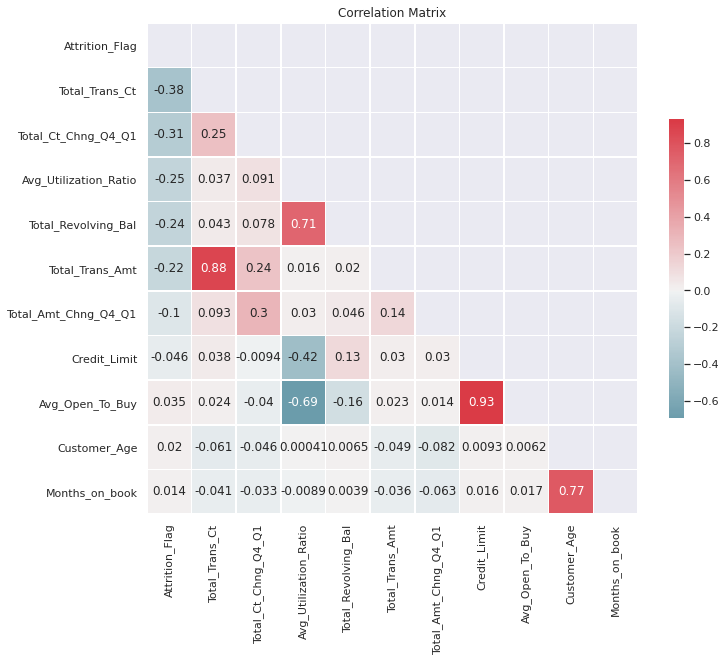

In [18]:
corr_data = df_train[numerical_col + ["Attrition_Flag"]]
corr_data = corr_data.replace("Existing Customer", 0).replace("Attrited Customer", 1)
correlation_matrix(corr_data, target_var="Attrition_Flag")

We will look at the variables with highest correlation values.

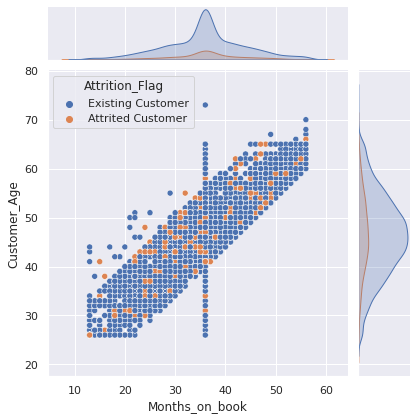

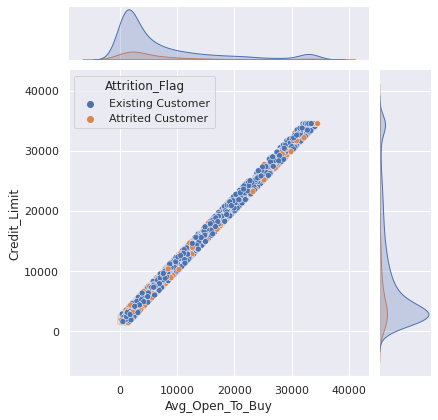

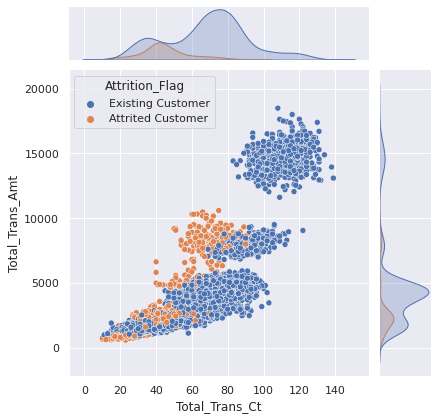

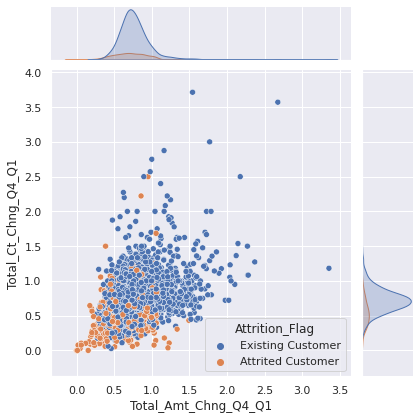

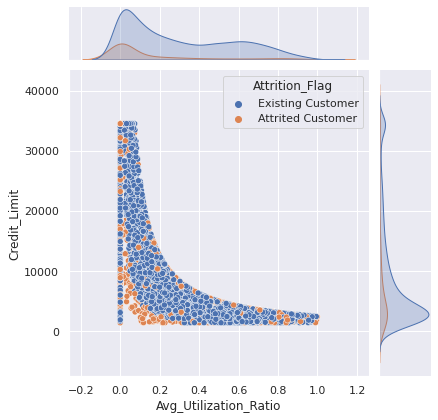

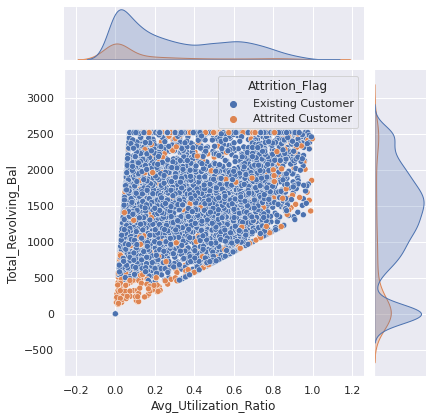

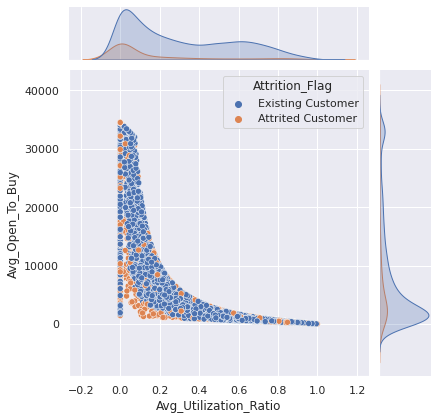

In [19]:
strong_corr = [
  ('Months_on_book', 'Customer_Age'),
  ('Avg_Open_To_Buy', 'Credit_Limit'),
  ('Total_Trans_Ct', 'Total_Trans_Amt'),
  ('Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1'),
  ('Avg_Utilization_Ratio', 'Credit_Limit'),
  ('Avg_Utilization_Ratio', 'Total_Revolving_Bal'),
  ('Avg_Utilization_Ratio', 'Avg_Open_To_Buy'),
]

for var1, var2 in strong_corr:
    sns.jointplot(data=df_train, x=df_train[var1], y=df_train[var2], hue="Attrition_Flag");

* `Months_on_book` is highly linearly correlated to `Customer_Age`.
* `Avg_Open_To_Buy` is also highly linearly correlated to `Credit_Limit`.
* `Total_Trans_Ct` and `Total_Trans_Amt` are also correlated.
* We can see some sort of relationship between `Total_Revolving_Bal` and `Avg_Utilization_Ratio`

We will need to look at which one to keep.

**For now let's inspect the distributions of our numerical variables.**

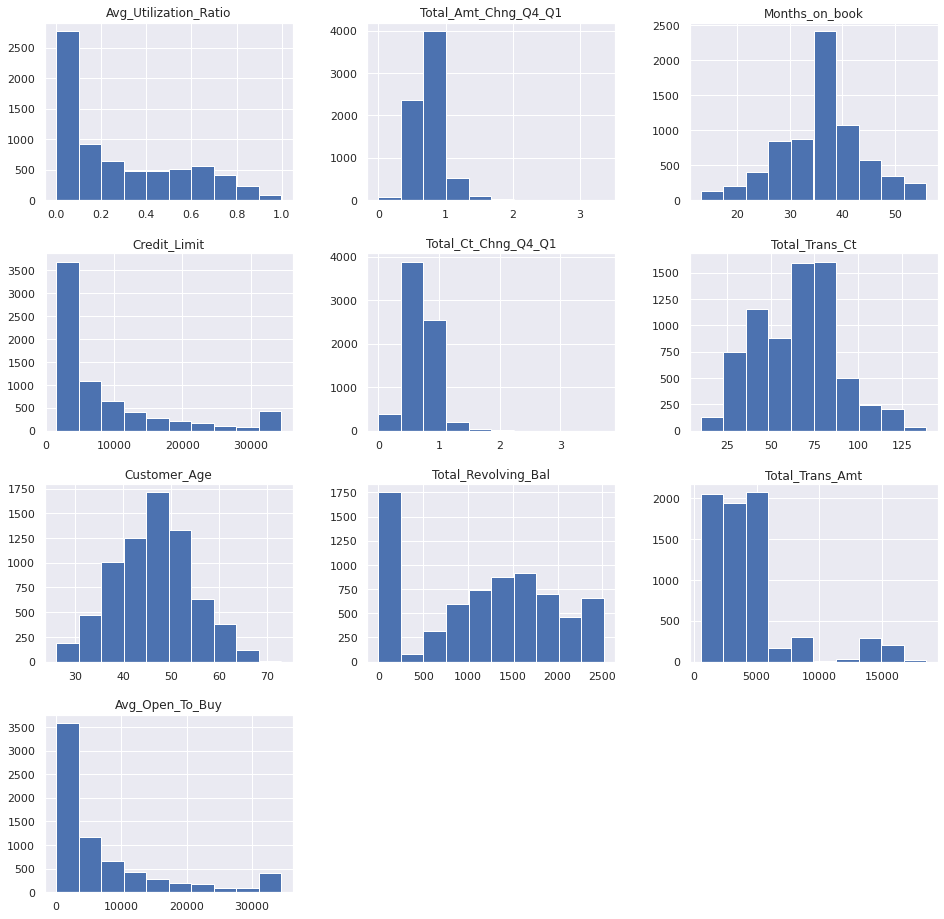

In [20]:
df_train[numerical_col].hist(figsize=(16,16));

We have some variables that are not evenly distributed, for example `'Avg_Open_To_Buy'`, `'Avg_Utilization_Ratio'`, `'Credit_Limit'`, `'Total_Amt_Chng_Q4_Q1'`, `'Total_Trans_Amt'`. It could be interesting to investigate how the distributions will improve with transformations.

Let's check how variables are distributed for Existing and Attrited Customers

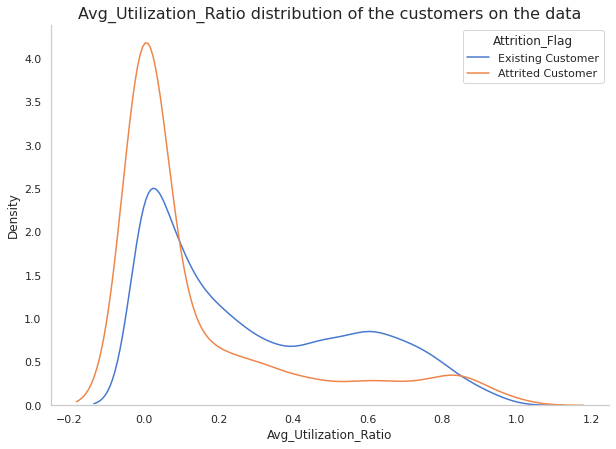

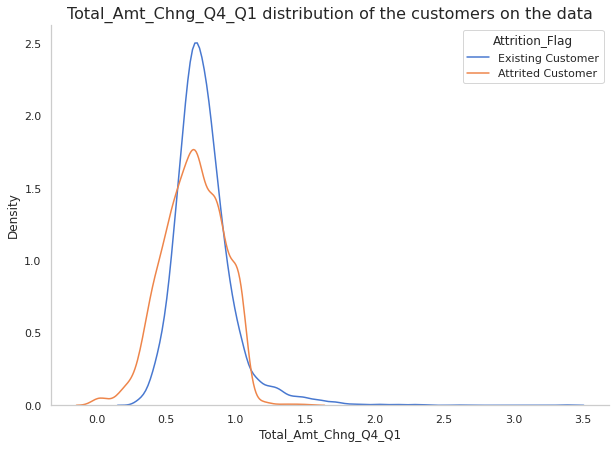

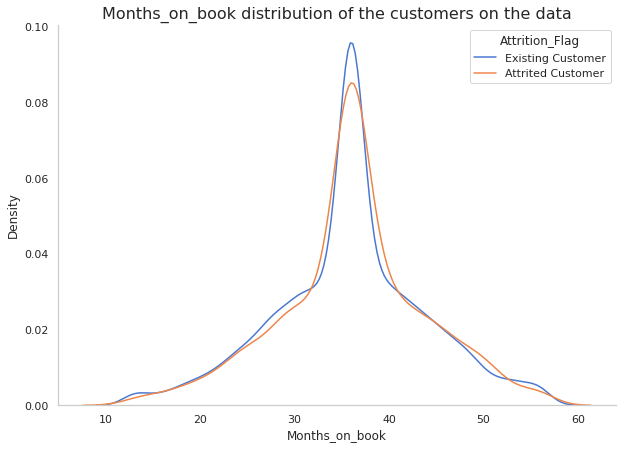

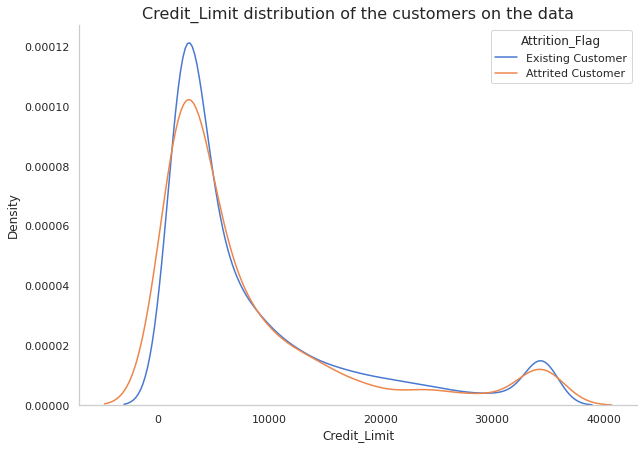

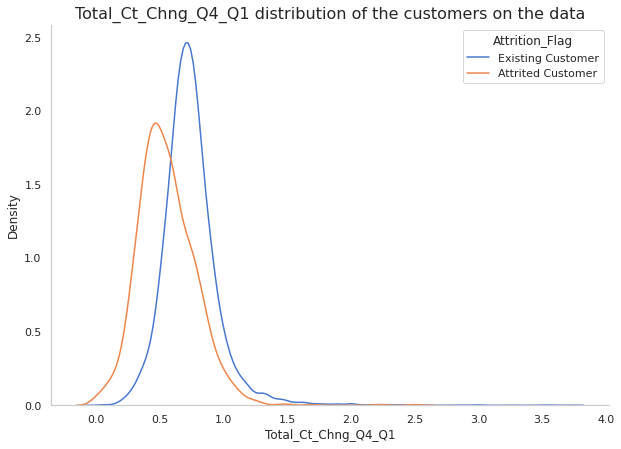

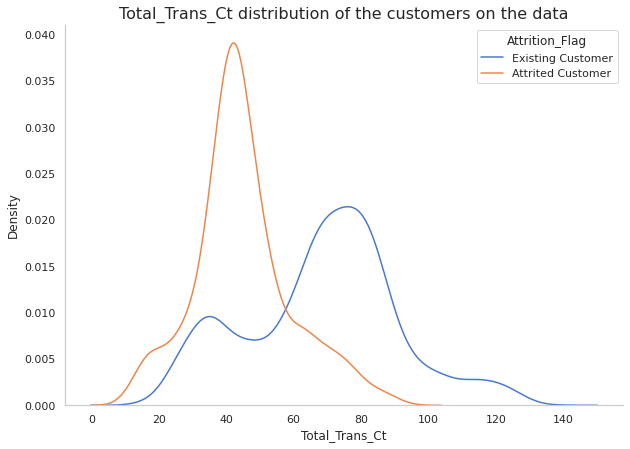

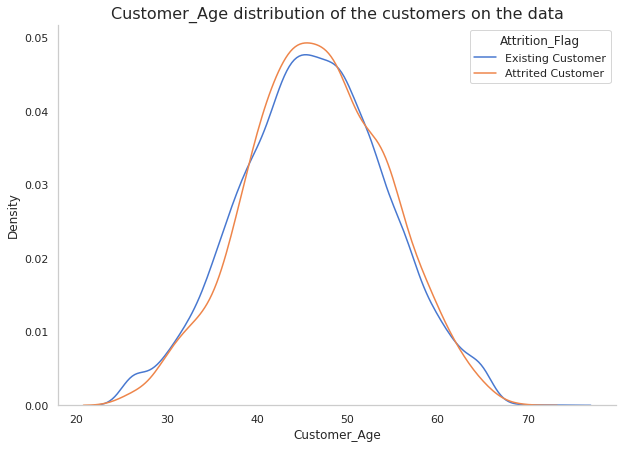

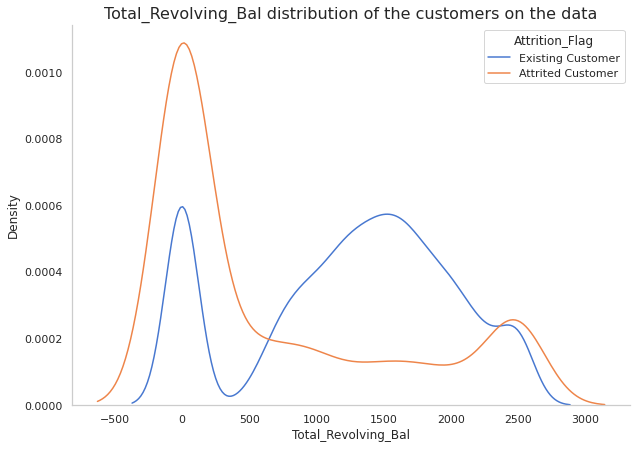

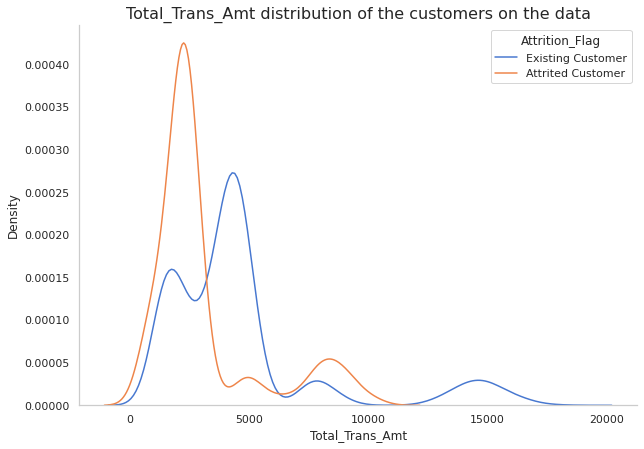

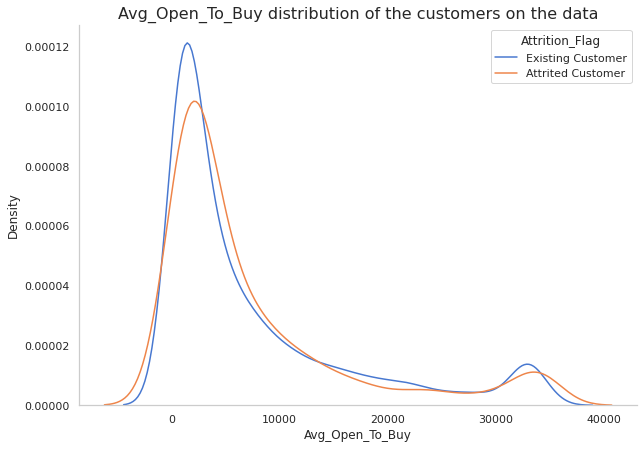

In [21]:
for var in numerical_col:
    plot_distplot(df=data, col=var,
                  title= var + ' distribution of the customers on the data',
                  hue='Attrition_Flag');

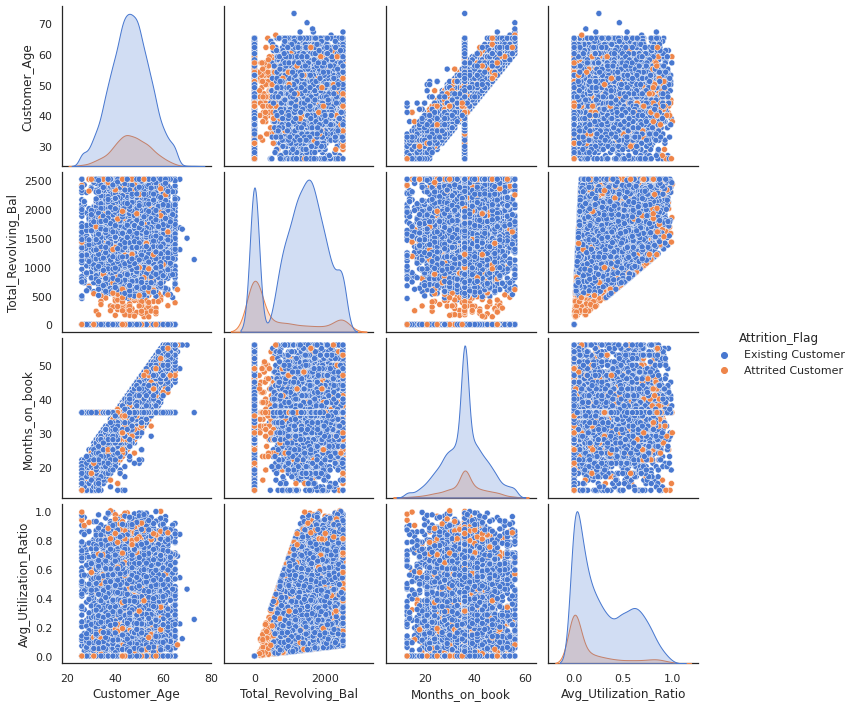

In [22]:
charac_var = ["Customer_Age", "Attrition_Flag", "Total_Revolving_Bal", "Months_on_book", "Avg_Utilization_Ratio"]
# plt.figure(figsize=(15,8))
sns.pairplot(df_train[charac_var], hue="Attrition_Flag");

**Let's inspect where the support indicate higher proportion of attrited customers**

Customers are more likely to churn when : 
 * `Total_Revolving_Bal` is low
 * `Total_Trans_Ct` is around 40
 * `Total_Trans_Amt` is around 2500


These attribute seems to be informative since the Attrition rate varries across their ranges of values

**For `Total_Revolving_Bal` :**

In [23]:
new_ft = df_train[(df_train["Total_Revolving_Bal"] < 500)]
print(len(new_ft))
# Within people under 500€ how many are existing are attrited
new_ft["Attrition_Flag"].value_counts() / len(new_ft)

1824


Existing Customer    0.611294
Attrited Customer    0.388706
Name: Attrition_Flag, dtype: float64

In [24]:
new_ft = df_train[(df_train["Total_Revolving_Bal"] >= 500)]
print(len(new_ft))

# Within people above 500€ how many are existing and attrited
new_ft.groupby('Attrition_Flag').size() / len(new_ft)

5264


Attrition_Flag
Attrited Customer    0.081687
Existing Customer    0.918313
dtype: float64

Customers that use on average less than 500€ of their credit tend to churn more (39%),  than the rest (8%).

**For `Total_Trans_Ct` :**

In [25]:
new_ft = df_train[((df_train["Total_Trans_Ct"] < 45) & (df_train["Total_Trans_Ct"] > 35))]
print(len(new_ft))

# Within people under our scope (35-45 use count) how many are existing and attrited
new_ft.groupby('Attrition_Flag').size() / len(new_ft)

863


Attrition_Flag
Attrited Customer    0.472769
Existing Customer    0.527231
dtype: float64

In [26]:
new_ft = df_train[~((df_train["Total_Trans_Ct"] < 45) & (df_train["Total_Trans_Ct"] > 35))]
print(len(new_ft))

# Within people out of our scope ( <2000 and >3000 €) how many are existing and attrited
new_ft.groupby('Attrition_Flag').size() / len(new_ft)

6225


Attrition_Flag
Attrited Customer    0.11743
Existing Customer    0.88257
dtype: float64

Customers that use on average between 35 and 45 times their card tend to churn more (47%),  than the rest (11%).

**For `Total_Trans_Amt` :**

In [27]:
new_ft = df_train[((df_train["Total_Trans_Amt"] < 3000) & (df_train["Total_Trans_Amt"] > 2000))]
print(len(new_ft))

# Within people under our scope ( 2000-3000 €) how many are existing and attrited
new_ft.groupby('Attrition_Flag').size() / len(new_ft)

1146


Attrition_Flag
Attrited Customer    0.481675
Existing Customer    0.518325
dtype: float64

In [28]:
new_ft = df_train[~((df_train["Total_Trans_Amt"] < 3000) & (df_train["Total_Trans_Amt"] > 2000))]
print(len(new_ft))

# Within people out of our scope ( <2000 and >3000 €) how many are existing and attrited
new_ft.groupby('Attrition_Flag').size() / len(new_ft)

5942


Attrition_Flag
Attrited Customer    0.098788
Existing Customer    0.901212
dtype: float64

Customers that use on average between 2000 and 3000 of their credit tend to churn more (48%),  than the rest (10%).

## Let's ask us some questions

### Attrition rate confidence interval at 95% ?

In [29]:
# 15% sample of observations
sample_df = df_train["Attrition_Flag"].sample(frac=.15, random_state=3)
nb_obs_sample = len(sample_df)
nb_attrition = len(sample_df[sample_df == 'Attrited Customer'])
pct_attrition = nb_attrition / nb_obs_sample

print('Number of instances: {:,}'.format(nb_obs_sample))
print('Number of Attrited Customers {:,}'.format(nb_attrition))
print('Attrition rate: {:.2f}%'.format(pct_attrition * 100.))

Number of instances: 1,063
Number of Attrited Customers 190
Attrition rate: 17.87%


In [30]:
se = np.sqrt(pct_attrition * (1-pct_attrition) / nb_obs_sample)

print('Standard error: {:.3f}'.format(se))
print('95% confidence interval for pct_attrition_hat: ({:.3f}, {:.3f})'.format(pct_attrition - se*1.96, pct_attrition + se*1.96))

Standard error: 0.012
95% confidence interval for pct_attrition_hat: (0.156, 0.202)


**What is the probability that a customer who has a Average use below 0.1 would churn ?**


$P(Attrition=1 \mid AvgUse<0.1)$ = $\frac{P(AvgUse<0.1 \mid Attrition=1) * P(Attrition=1)}{P(AvgUse<0.1)}$

In [31]:
attrited = df_train[df_train["Attrition_Flag"] == 'Attrited Customer']
pct_attrited = len(attrited) / len(df_train)

print('Number of customers : {:,}'.format(len(df_train)))
print('Percent of customers that attrited: {:.2f}%'.format(pct_attrited*100.))
use01_attrited = sum(attrited["Avg_Utilization_Ratio"] < 0.1)
pct_use01_attrited = use01_attrited / len(attrited)

use_01 = df_train[(df_train["Avg_Utilization_Ratio"] < 0.1)]
pct_use01 = len(use_01) / len(df_train)

proba_att_use01 = (pct_use01_attrited * pct_attrited) / pct_use01

print('Number of customers with Avg_Utilization_Ratio below 0.1: {:,}\n'
      .format(len(use_01)))
print('P(Attrition=1∣AvgUse<0.1): {:.2f} %'
      .format(proba_att_use01*100))

Number of customers : 7,088
Percent of customers that attrited: 16.07%
Number of customers with Avg_Utilization_Ratio below 0.1: 2,776

P(Attrition=1∣AvgUse<0.1): 26.87 %


This is higher than the base churning rate of 16.07%, so customers with an average use under 0.1 are more likely to convert than on average. 

We now take a random sample of 15% of the training set to estimate a confidence interval from this proportion.

In [32]:
sample_10 = df_train.sample(frac=0.15, random_state=3)

attrited = sample_10[sample_10["Attrition_Flag"] == 'Attrited Customer']
pct_attrited = len(attrited) / len(sample_10)

print('Number of customers in our sample : {:,}'.format(len(sample_10)))
print('Percent of customers that attrited in this sample : {:.2f}%'.format(pct_attrited*100.))

use01_attrited = sum(attrited["Avg_Utilization_Ratio"] < 0.1)
pct_use01_attrited = use01_attrited / len(attrited)

use_01 = sample_10[(sample_10["Avg_Utilization_Ratio"] < 0.1)]
pct_use01 = len(use_01) / len(sample_10)

proba_att_use01 = (pct_use01_attrited * pct_attrited) / pct_use01

print('Number of customers in the sample with Avg_Utilization_Ratio below 0.1: {:,}\n'
      .format(len(use_01)))
print('P(Attrition=1∣AvgUse<0.1): {:.2f} %'
      .format(proba_att_use01*100))

Number of customers in our sample : 1,063
Percent of customers that attrited in this sample : 17.87%
Number of customers in the sample with Avg_Utilization_Ratio below 0.1: 438

P(Attrition=1∣AvgUse<0.1): 28.08 %


In [33]:
se = np.sqrt(proba_att_use01 * (1-proba_att_use01) / len(sample_10))

print('P(Attrition=1∣AvgUse<0.1): {:.4f}'
      .format(proba_att_use01))
print('Standard error: {:.3f}'
      .format(se))

print('95% confidence interval for p_hat: ({:.2f}, {:.2f})'
      .format(proba_att_use01 - se*1.96, proba_att_use01 + se*1.96))

P(Attrition=1∣AvgUse<0.1): 0.2808
Standard error: 0.014
95% confidence interval for p_hat: (0.25, 0.31)


Our *confidence interval* indicates that we are sure at 95% that our proba for customers to churn when they have an `Average_Use_Ratio` below *0.1* is between *25%* and *31%*. Which confirm what we previously obtained and computed. Customers with `Average_Use_Ratio` are more likely to churn.

***Now that we know our data, and we know where we could implement changes let's move to part 2***